In [1]:
import pandas as pd
import numpy as np
import scipy.stats as ss
from itertools import product
from tqdm.notebook import tqdm

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, confusion_matrix  

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
df = pd.read_csv('data/responses_.csv')

In [3]:
df.describe()

,AM1,AM2,AM3,AM4,DM1,DM2,DM3,DM4,EDT1,EDT2,...,SQ3,SQ4,FST1,FST2,FST3,FST4,FI1,FI2,FI3,FI4
count,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,...,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000
mean,3.957143,4.080952,4.190476,4.080952,3.995238,4.080952,4.038095,4.033333,4.114286,4.147619,...,3.790476,3.766667,3.671429,3.800000,2.252381,2.490476,3.847619,3.914286,3.909524,4.023810
std,0.919263,0.884810,0.886855,0.962512,0.960949,0.927062,0.916868,0.940240,0.956612,0.918767,...,0.985010,0.972263,0.870375,0.900824,1.029758,1.081557,0.827528,0.859668,0.883883,0.882799
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,...,3.000000,3.250000,3.000000,3.000000,2.000000,2.000000,4.000000,4.000000,4.000000,4.000000
50%,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,...,4.000000,4.000000,4.000000,4.000000,2.000000,2.000000,4.000000,4.000000,4.000000,4.000000
75%,4.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,...,4.000000,4.000000,4.000000,4.000000,3.000000,3.000000,4.000000,4.000000,4.000000,5.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [4]:
df.isna().sum().sum()

0

In [5]:
df.columns

Index(['AM1', 'AM2', 'AM3', 'AM4', 'DM1', 'DM2', 'DM3', 'DM4', 'EDT1', 'EDT2',
       'EDT3', 'EDT4', 'EDT5', 'FM1', 'FM2', 'FM3', 'OTPM1', 'OTPM2', 'OTPM3',
       'OTPM4', 'PM1', 'PM2', 'PM3', 'PM4', 'QM1', 'QM2', 'QM3', 'QM4', 'SHE1',
       'SHE2', 'SHE3', 'SHE4', 'FS1', 'FS2', 'FS3', 'FS4', 'OEE1', 'OEE2',
       'OEE3', 'OEE4', 'CMP1', 'CMP2', 'CMP3', 'CMP4', 'CMP5', 'CMP6', 'CMP7',
       'PR1', 'PR2', 'PR3', 'PR4', 'A1', 'A2', 'A3', 'A4', 'RL1', 'RL2', 'RL3',
       'RL4', 'EM1', 'EM2', 'EM3', 'EM4', 'RS1', 'RS2', 'RS3', 'RS4', 'T1',
       'T2', 'T3', 'T4', 'SQ1', 'SQ2', 'SQ3', 'SQ4', 'FST1', 'FST2', 'FST3',
       'FST4', 'FI1', 'FI2', 'FI3', 'FI4'],
      dtype='object')

# Get Average Per Class

In [6]:
big_list = []
small_list = []
for i in list(df.columns):
    if small_list == []:
        small_list.append(i)
    if i[:-1] == small_list[0][:-1]:
        small_list.append(i)
    if i[:-1] != small_list[0][:-1]:
        big_list.append(list(set(small_list)))
        small_list = []
        small_list.append(i)

In [7]:
big_list.append(['FI1', 'FI2', 'FI3', 'FI4'])
big_list

[['AM4', 'AM2', 'AM1', 'AM3'],
 ['DM1', 'DM3', 'DM4', 'DM2'],
 ['EDT3', 'EDT4', 'EDT1', 'EDT2', 'EDT5'],
 ['FM3', 'FM2', 'FM1'],
 ['OTPM2', 'OTPM4', 'OTPM3', 'OTPM1'],
 ['PM2', 'PM4', 'PM3', 'PM1'],
 ['QM4', 'QM3', 'QM2', 'QM1'],
 ['SHE4', 'SHE2', 'SHE1', 'SHE3'],
 ['FS2', 'FS1', 'FS3', 'FS4'],
 ['OEE2', 'OEE3', 'OEE1', 'OEE4'],
 ['CMP5', 'CMP3', 'CMP7', 'CMP2', 'CMP6', 'CMP1', 'CMP4'],
 ['PR4', 'PR2', 'PR3', 'PR1'],
 ['A4', 'A2', 'A3', 'A1'],
 ['RL2', 'RL3', 'RL1', 'RL4'],
 ['EM1', 'EM3', 'EM4', 'EM2'],
 ['RS1', 'RS2', 'RS3', 'RS4'],
 ['T1', 'T2', 'T3', 'T4'],
 ['SQ2', 'SQ4', 'SQ1', 'SQ3'],
 ['FST3', 'FST4', 'FST1', 'FST2'],
 ['FI1', 'FI2', 'FI3', 'FI4']]

In [8]:
median_df = pd.DataFrame()

for small_list in big_list:
    marker = small_list[0][:-1]
    ave = df[small_list].median(axis=1).values
    ceil = ave # np.ceil(ave)
    median_df[marker] = ceil

In [9]:
median_df.to_csv('data/median_df.csv', index=False) #Save Median

In [10]:
median_df.shape

(210, 20)

In [11]:
median_df

,AM,DM,EDT,FM,OTPM,PM,QM,SHE,FS,OEE,CMP,PR,A,RL,EM,RS,T,SQ,FST,FI
0,4.0,4.0,4.0,4.0,4.0,4.0,4.5,4.0,4.5,4.0,4.0,4.0,3.0,4.0,3.0,3.0,3.0,3.0,3.0,3.0
1,4.0,4.0,4.0,3.0,4.0,4.0,4.0,4.0,5.0,3.5,4.0,4.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,4.0
2,4.0,4.0,3.0,4.0,2.0,4.0,4.5,5.0,5.0,5.0,4.0,4.0,1.5,2.0,3.0,3.0,3.0,2.5,2.5,4.0
3,5.0,5.0,5.0,5.0,3.5,4.0,4.5,5.0,5.0,4.0,5.0,3.0,3.0,4.0,3.5,3.5,4.0,3.5,3.0,4.0
4,5.0,3.5,4.0,4.0,2.5,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,3.5,4.0,3.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
205,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0
206,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
207,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0
208,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


# Perform Chi-Square Test

In [12]:
cat_var1  = list(median_df.columns)
cat_var2  = list(median_df.columns)

In [13]:
# Get All Possible Combinations

cat_var_prod = list(product(cat_var1,cat_var2, repeat = 1))

In [14]:
result = []

for i in tqdm(cat_var_prod):
    if i[0] != i[1]:
        result.append((i[0],i[1],list(ss.chi2_contingency(pd.crosstab(
            median_df[i[0]], median_df[i[1]])))[1]))

  0%|          | 0/400 [00:00<?, ?it/s]

In [15]:
chi_test_output = pd.DataFrame(result, columns = ['var1', 'var2', 'coeff'])
chi_test_output['coeff'] = np.around(chi_test_output['coeff'].values, decimals=3)
pivot_ct = chi_test_output.pivot(index='var1', columns='var2', values='coeff')

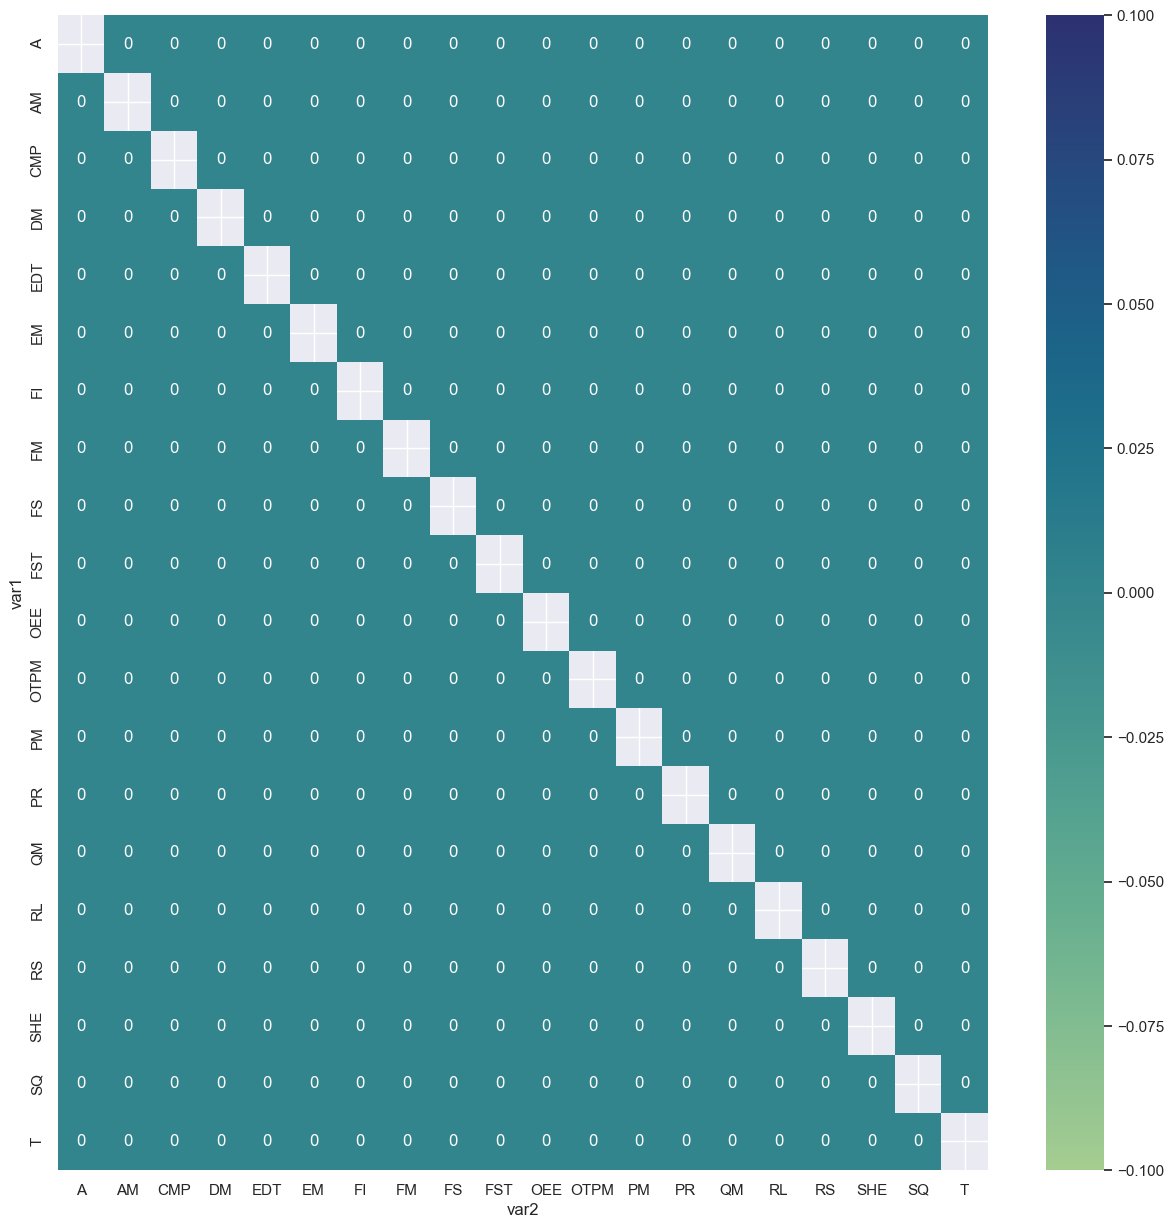

In [16]:
plt.figure(figsize=(15,15))
sns.heatmap(pivot_ct, annot=True, cmap='crest')

plt.show()